In [3]:
#!ls ~/trained_models

In [4]:
#!ls ~/trained_models/
from pathlib import Path
from datatype_recovery.models.dataset import load_dataset_from_path
from datatype_recovery.models.dataset.encoding import *

import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

# dataset_path = Path.home()/'datasets/NEW_ENCODING'
# dataset_path = Path.home()/'datasets/stateformer33_5hops'
# dataset_path = Path.home()/'datasets/coreutils_5hops'

# dataset_path = Path.home()/'datasets/coreutils_dpid_5hops'
# dataset_path = Path.home()/'datasets/trainset_balanced_med_dpid'
# dataset_path = Path.home()/'datasets/trainset_unbalanced_med_dpid'
# dataset_path = Path.home()/'datasets/trainset_unbalanced2_dpid'

dataset_path = Path.home()/'datasets/coreutils_5hops_toparent'

# model_path = Path.home()/'trained_models/dragon_5hops_5heads_3lin__NEW_ENCODING_ep30.pt'
# model_path = Path.home()/'trained_models/dragon_5hops_5heads_3lin__dpid_ep50.pt'

# model_path = Path.home()/'trained_models/dragon_5hops_3heads_2lin_64hc__dpid_ep100.pt'

# model_path = Path.home()/'trained_models/dragon_5hps_3hds_2lin_64hc__ub2_ep20.pt'
# model_path = Path.home()/'trained_models/dragon_5hps_3hds_2lin_64hc__ub2.pt'
#model_path = Path.home()/'trained_models/dragonDT_5hps_3hds_2lin_64hc__ub2_ep80.pt'
model_path = Path.home()/'trained_models/dragonDT_5hps_3hds_2lin_64hc__ub3_ep60.pt'

In [5]:
dataset = load_dataset_from_path(dataset_path)
vdf = dataset.read_vars_csv()
vdf

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,False,1,PLL,P,L,L,1000,l,False,False
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16.0,PTR,"PTR,char",codeset,...,False,1,PLL,P,L,L,1000,l,False,False
2,1053417,"37,78,82,107,111",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,False,0,LLL,L,L,L,1001,l,False,False
3,1053575,"37,94,114",local_b8,timeval,stack,NaN,-184.0,STRUCT,STRUCT,real_end,...,False,0,LLL,L,L,L,1001,l,False,False
4,1053575,"57,160,180,226,246",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,False,0,LLL,L,L,L,1001,l,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52740,1081910,"15,21,25",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52741,1081955,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52742,1081991,"14,14",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52743,1082065,"14,25,25,34",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False


In [6]:
#vdf.groupby('TypeSeq_Debug').count()

In [7]:
data = dataset[0]
print(data.varid)
def equals_varid(df:pd.DataFrame, varid:tuple) -> pd.Series:
    '''
    Returns a boolean Series where the rows of the given df have varid.

    This can be used to filter df: df.loc[equals_varid(df, varid),:]
    '''
    return (df.BinaryId==varid[0]) & \
           (df.FunctionStart==varid[1]) & \
           (df.Signature==varid[2]) & \
           (df.Vartype==varid[3])
vdf[equals_varid(vdf, data.varid)]

(1000, 1053065, '25,33', 'l')


,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,False,1,PLL,P,L,L,1000,l,False,False


In [8]:
print(vdf[equals_varid(vdf, data.varid)].iloc[0].Type_Strip)
data.x.shape
data.x[0,None].shape
_, dtype_vec, _ = NodeEncoder.split_node_vec(data.x[0])
# str(TypeEncoder.decode(dtype_vec)) == vdf[equals_varid(vdf, data.varid)].iloc[0].Type_Strip
dtype_vec.shape

char*


torch.Size([22])

In [9]:
ghidra_baseline_acc = len(vdf[vdf.TypeSeq_Strip==vdf.TypeSeq_Debug])/len(vdf)*100
print(f'Ghidra\'s accuracy (baseline): {ghidra_baseline_acc:.2f}%')

Ghidra's accuracy (baseline): 63.83%


In [10]:
# turn this on to see Ghidra's accuracy info
# vdf['LeafType'] = vdf.TypeSeq_Debug.apply(lambda x: x.split(',')[-1])
# vdf['GhidraCorrect'] = vdf.TypeSeq_Debug==vdf.TypeSeq_Strip
# vdf.groupby('TypeSeq_Debug').apply(lambda gb: gb.GhidraCorrect.sum()/len(gb)*100).sort_values().plot(kind='bar',figsize=(12,6))

In [11]:
dataset_path.name
modelcsv = Path.cwd()/f'{model_path.stem}--{dataset_path.name}.modelout.csv'

In [12]:
from datatype_recovery.models.eval import make_predictions_on_dataset

# DEVICE = 'cuda:2'
DEVICE = 'cpu'

if modelcsv.exists():
    print(f'Reading in existing model outputs from {modelcsv}')
    model_pred = pd.read_csv(modelcsv)
else:
    model_pred = make_predictions_on_dataset(model_path, DEVICE, dataset)
    print(f'Saving model predictions to {modelcsv}')
    model_pred.to_csv(modelcsv, index=False)

Reading in existing model outputs from /home/cls0027/dev/datatype-recovery-experiments/notebooks/dragonDT_5hps_3hds_2lin_64hc__ub3_ep60--coreutils_5hops_toparent.modelout.csv


In [13]:
model = torch.load(model_path)
f'Model has {sum(p.numel() for p in model.parameters()):,} parameters'

'Model has 242,198 parameters'

In [14]:
model_pred

,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1000,1053065,"25,33",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
1,1000,1053110,"17,26,40,48,62,66",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
2,1001,1053417,"37,78,82,107,111",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
3,1001,1053417,"78,82,107,111,130",p,"PTR,STRUCT","PTR,STRUCT",PLL,P,L,L,STRUCT,False,False,0
4,1001,1053575,"37,94,114",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52740,1116,1081955,14,p,uint32,uint32,LLL,L,L,L,BUILTIN,False,False,4
52741,1116,1081991,"60,67,73",l,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52742,1116,1081991,"14,14",p,uint32,uint32,LLL,L,L,L,BUILTIN,False,False,4
52743,1116,1082065,"14,25,25,34",p,uint32,uint32,LLL,L,L,L,BUILTIN,False,False,4


In [15]:
mdf = vdf.merge(model_pred, how='right', on=['BinaryId','FunctionStart','Signature','Vartype'])
mdf['LeafType'] = mdf.TypeSeq_Debug.apply(lambda x: x.split(',')[-1])
mdf['PredLeafType'] = mdf.Pred.apply(lambda x: x.split(',')[-1])
mdf['NumRefs'] = mdf.Signature.apply(lambda sig: len(sig.split(',')))
mdf['Correct'] = mdf.TypeSeq_Debug==mdf.Pred
mdf

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType,NumRefs,Correct
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,L,L,BUILTIN,True,False,1,char,char,2,True
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16.0,PTR,"PTR,char",codeset,...,L,L,BUILTIN,True,False,1,char,char,6,True
2,1053417,"37,78,82,107,111",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,L,L,STRUCT,False,False,0,STRUCT,STRUCT,5,True
3,1053417,"78,82,107,111,130",param_1,timeval*,register,rdi,56.0,PTR,"PTR,STRUCT",ts,...,L,L,STRUCT,False,False,0,STRUCT,STRUCT,5,True
4,1053575,"37,94,114",local_b8,timeval,stack,NaN,-184.0,STRUCT,STRUCT,real_end,...,L,L,STRUCT,False,False,0,STRUCT,STRUCT,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52740,1081955,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,L,L,BUILTIN,False,False,4,int32,uint32,1,False
52741,1081991,"60,67,73",uVar1,uint64,register,rax,0.0,BUILTIN,uint64,_Var1,...,L,L,BUILTIN,True,False,4,char,int32,3,False
52742,1081991,"14,14",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,L,L,BUILTIN,False,False,4,int32,uint32,2,False
52743,1082065,"14,25,25,34",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,L,L,BUILTIN,False,False,4,int32,uint32,4,False


In [16]:
import seaborn as sns

# context: talk, notebook, paper, poster
# palette: muted, Paired, hls, husl, pastel, bright, deep, dark, colorblind
sns.set_theme(style='whitegrid', context='notebook', palette='muted')

In [17]:
def percent_accuracy(df:pd.DataFrame, col1:str, col2:str) -> float:
    return len(df[df[col1]==df[col2]])/len(df)*100

acc = percent_accuracy(mdf, 'TypeSeq_Debug', 'Pred')
acc_raw = percent_accuracy(mdf, 'TypeSeq_Debug', 'RawPred')

print(f'Eval dataset size = {len(mdf):,}')
print(f'Accuracy: {acc:.2f}%')
print(f'Accuracy (raw): {acc_raw:.2f}%')

Eval dataset size = 52,745
Accuracy: 69.62%
Accuracy (raw): 69.62%


In [18]:
mdf[['TypeSeq_Debug','Pred','LeafType','PredLeafType']]

,TypeSeq_Debug,Pred,LeafType,PredLeafType
0,"PTR,char","PTR,char",char,char
1,"PTR,char","PTR,char",char,char
2,STRUCT,STRUCT,STRUCT,STRUCT
3,"PTR,STRUCT","PTR,STRUCT",STRUCT,STRUCT
4,STRUCT,STRUCT,STRUCT,STRUCT
...,...,...,...,...
52740,int32,uint32,int32,uint32
52741,char,int32,char,int32
52742,int32,uint32,int32,uint32
52743,int32,uint32,int32,uint32


In [19]:
ll = pd.read_csv(Path.home()/'exp_builds/coreutils.exp/rundata/run1/locals.csv')
ll

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,TypeJson_Debug,LeafCategory,LeafSigned,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId
0,1053065,"25,33",__s,char*,register,rax,0,PTR,"PTR,char",__s,...,"{""kind"": ""Pointe...",BUILTIN,True,False,1,PLL,P,L,L,0
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16,PTR,"PTR,char",codeset,...,"{""kind"": ""Pointe...",BUILTIN,True,False,1,PLL,P,L,L,0
2,1053417,"37,78,82,107,111",local_a8,rusage,stack,NaN,-168,STRUCT,STRUCT,usage,...,"{""kind"": ""Struct...",STRUCT,False,False,0,LLL,L,L,L,1
3,1053575,"37,94,114",local_b8,timeval,stack,NaN,-184,STRUCT,STRUCT,real_end,...,"{""kind"": ""Struct...",STRUCT,False,False,0,LLL,L,L,L,1
4,1053575,"57,160,180,226,246",local_a8,rusage,stack,NaN,-168,STRUCT,STRUCT,usage,...,"{""kind"": ""Struct...",STRUCT,False,False,0,LLL,L,L,L,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48253,1081205,"58,118,177,183",uVar1,uint64,register,rax,0,BUILTIN,uint64,iVar1,...,"{""kind"": ""Builti...",BUILTIN,True,False,4,LLL,L,L,L,116
48254,1081205,"72,85,95",sVar2,uint64,register,rax,0,BUILTIN,uint64,sVar2,...,"{""kind"": ""Builti...",BUILTIN,False,False,8,LLL,L,L,L,116
48255,1081462,"48,55,61",uVar1,uint64,register,rax,0,BUILTIN,uint64,_Var1,...,"{""kind"": ""Builti...",BUILTIN,True,False,1,LLL,L,L,L,116
48256,1081607,"23,30,35",uVar1,uint32,register,eax,0,BUILTIN,uint32,NaN,...,NaN,COMP,False,False,0,LLL,L,L,L,116


In [20]:
loc_groups = ll[(ll.TypeSeq_Debug=='COMP')&(ll.BinaryId==116)].groupby('LocType_Strip').count().FunctionStart
loc_groups/loc_groups.sum()*100

LocType_Strip
register    32.50
stack       53.75
unique      13.75
Name: FunctionStart, dtype: float64

In [21]:
print(hex(1090260))
#ll[(ll.FunctionStart==1068953)&(ll.BinaryId==103)]
#ll[(ll.BinaryId==103)&(ll.TypeSeq_Debug=='COMP')&(ll.LocType_Strip=='stack')]
#ll.LeafSigned!=ll.LeafSignedPred
#mdf[(mdf.PredLeafSigned!=mdf.LeafSigned)&(mdf.BinaryId==1103)][['FunctionStart','Name_Strip','Name_Debug','TypeSeq_Debug','Pred']]
mdf[(mdf.LocType_Strip=='unique')&(mdf.BinaryId==1103)]#[['FunctionStart','Name_Strip','Name_Debug','TypeSeq_Debug','Pred']]

0x10a2d4


,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType,NumRefs,Correct
46850,1058941,"23,34",__s,char*,unique,NaN,268435474.0,PTR,"PTR,char",__s,...,L,L,BUILTIN,True,False,1,char,char,2,True
46851,1058941,"0,34",__stream,FILE*,unique,NaN,268435530.0,PTR,"PTR,STRUCT",__stream,...,L,L,BUILTIN,True,False,1,STRUCT,char,2,False
46852,1058988,"400,434",__stream,FILE*,unique,NaN,268435802.0,PTR,"PTR,STRUCT",__stream,...,L,L,BUILTIN,True,False,1,STRUCT,char,2,False
46860,1059590,"122,152,184,214,...",pFVar1,FILE*,unique,NaN,268436029.0,PTR,"PTR,STRUCT",pFVar1,...,L,L,BUILTIN,True,False,1,STRUCT,char,14,False
46870,1060370,"178,203,264",uVar1,uint64,unique,NaN,268435549.0,BUILTIN,uint64,sVar1,...,L,L,BUILTIN,False,False,8,uint64,uint64,3,True
46950,1066996,"20,33,62,84,243,259",uVar1,uint64,unique,NaN,49792.0,BUILTIN,uint64,uVar1,...,L,L,BUILTIN,False,False,8,uint64,uint64,6,True
46966,1068383,"45,58,58,87,231,...",lVar1,int64,unique,NaN,49792.0,BUILTIN,int64,sVar1,...,L,L,BUILTIN,False,False,8,uint64,uint64,8,True
47015,1084622,"21,71",iVar1,int32,unique,NaN,49536.0,BUILTIN,int32,iVar1,...,L,L,BUILTIN,True,False,4,int32,int32,2,True
47027,1084922,"37,57",uVar1,uint32,unique,NaN,49536.0,BUILTIN,uint32,wVar1,...,L,L,BUILTIN,False,False,4,int32,uint32,2,False
47039,1085467,"138,298,326,483,...",bVar1,char,unique,NaN,268436382.0,BUILTIN,char,bVar3,...,L,L,BUILTIN,True,False,1,char,char,14,True


In [22]:
row = mdf.iloc[52741]
row

FunctionStart                     1081991
Signature                        60,67,73
Name_Strip                          uVar1
Type_Strip                         uint64
LocType_Strip                    register
LocRegName_Strip                      rax
LocOffset_Strip                       0.0
TypeCategory_Strip                BUILTIN
TypeSeq_Strip                      uint64
Name_Debug                          _Var1
Type_Debug                           char
LocType_Debug                    register
LocRegName_Debug                       al
LocOffset_Debug                       0.0
TypeCategory_Debug                BUILTIN
TypeSeq_Debug                        char
HasDWARF                            False
TypeJson_Debug        {"kind": "Builti...
LeafCategory                      BUILTIN
LeafSigned                           True
LeafFloating                        False
LeafSize                                1
PtrLevels                             LLL
PtrL1                             

In [23]:
print(hex(row.FunctionStart))

0x108287


In [24]:
def plot_accuracies(df:pd.DataFrame, truth_outputs:List[str], rot:int=25, figsize=None):
    acc_values = []

    for t in truth_outputs:
        pred = f'Pred{t}'
        acc = percent_accuracy(df, t, pred)
        # print(f'{t} accuracy: {acc:.2f}%')
        acc_values.append((t, acc))

    ax = pd.DataFrame.from_records(acc_values, columns=['Output', 'Accuracy']).set_index('Output')\
        .Accuracy.sort_values(ascending=True).plot(kind='bar', rot=rot, title='Accuracy',
            ylabel='Accuracy (%)', xlabel='Classifier', figsize=figsize)
        # .sort_values('Accuracy',ascending=False).

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')#, label_type='center')

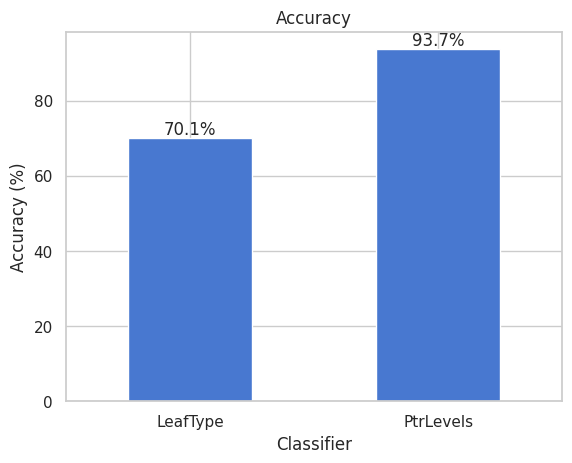

In [25]:
primary_outputs = ['PtrLevels','LeafType']
detailed_outputs = ['LeafCategory', 'LeafSigned', 'LeafFloating', 'LeafSize',
               'PtrL1', 'PtrL2', 'PtrL3']

plot_accuracies(mdf, primary_outputs, rot=0)

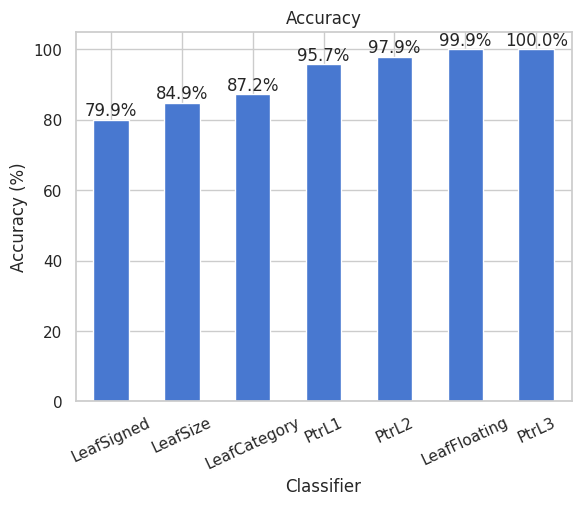

In [26]:
plot_accuracies(mdf, detailed_outputs)

In [27]:
len(mdf[mdf.PredLeafType=='ENUM'])/len(mdf)*100 + len(mdf[mdf.PredLeafType=='UNION'])/len(mdf)*100

1.3081808702246658

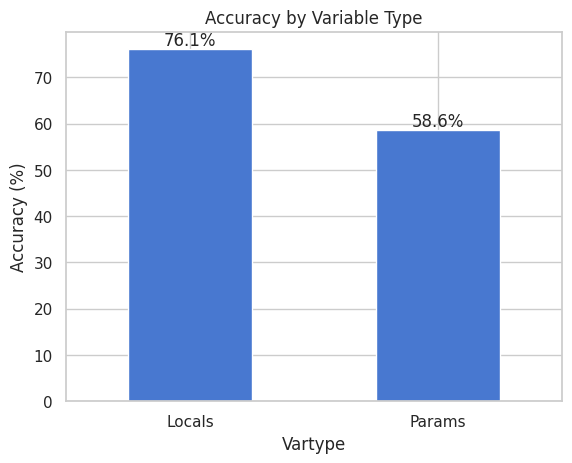

In [28]:
paramsdf = mdf.loc[mdf.Vartype=='p',:]
localsdf = mdf.loc[mdf.Vartype=='l',:]
# plot_accuracies(localsdf, primary_outputs)
# plot_accuracies(paramsdf, detailed_outputs)
len(paramsdf[paramsdf.TypeSeq_Debug==paramsdf.Pred])/len(paramsdf)*100
len(localsdf[localsdf.TypeSeq_Debug==localsdf.Pred])/len(localsdf)*100
ax = mdf.groupby('Vartype').apply(lambda gb: len(gb[gb.TypeSeq_Debug==gb.Pred])/len(gb)*100).rename({'l': 'Locals', 'p': 'Params'}).plot(
    kind='bar', rot=0, title='Accuracy by Variable Type', ylabel='Accuracy (%)')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')#, label_type='center')

<Axes: title={'center': 'Mispredicted Parameter LeafTypes'}, xlabel='LeafType'>

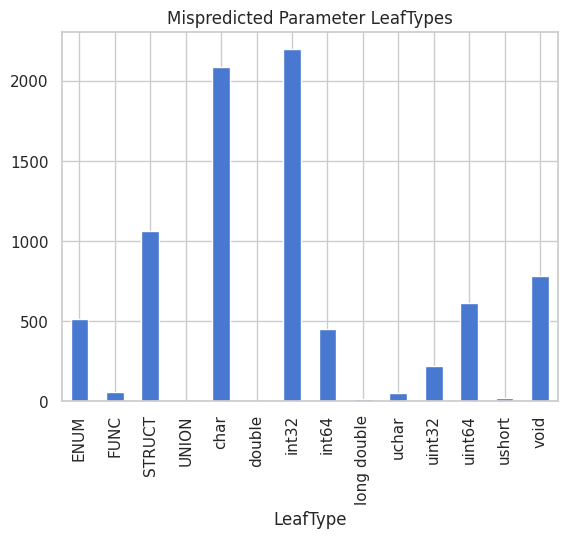

In [29]:
paramsdf[paramsdf.TypeSeq_Debug!=paramsdf.Pred].groupby('LeafType').count().FunctionStart.plot(kind='bar', title='Mispredicted Parameter LeafTypes')

<Axes: title={'center': 'Mispredicted Parameter Types'}, xlabel='TypeSeq_Debug'>

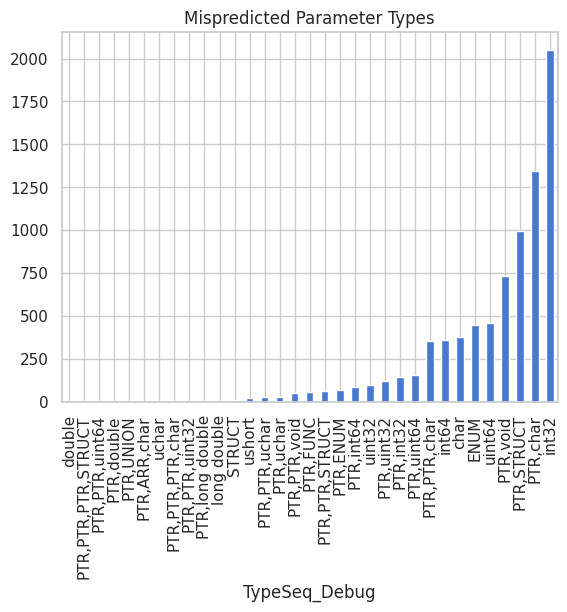

In [30]:
paramsdf[paramsdf.TypeSeq_Debug!=paramsdf.Pred].groupby('TypeSeq_Debug').count().FunctionStart.sort_values().plot(kind='bar', title='Mispredicted Parameter Types')

<Axes: xlabel='Pred'>

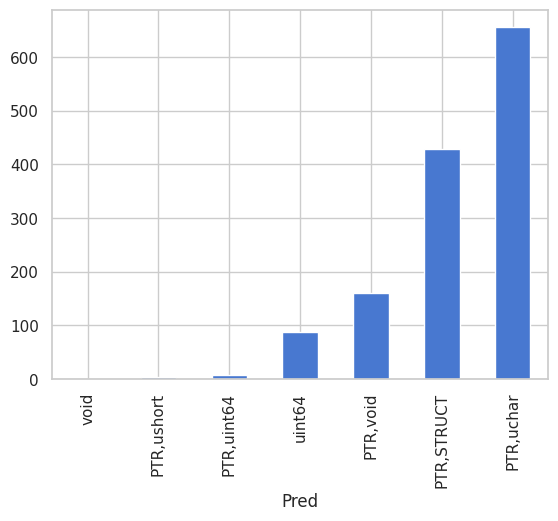

In [31]:
paramsdf[(paramsdf.TypeSeq_Debug!=paramsdf.Pred)&(paramsdf.TypeSeq_Debug=='PTR,char')].groupby('Pred').count().FunctionStart.sort_values().plot(kind='bar')

<Axes: title={'center': 'Incorrect LeafType Predictions'}, xlabel='LeafCategory'>

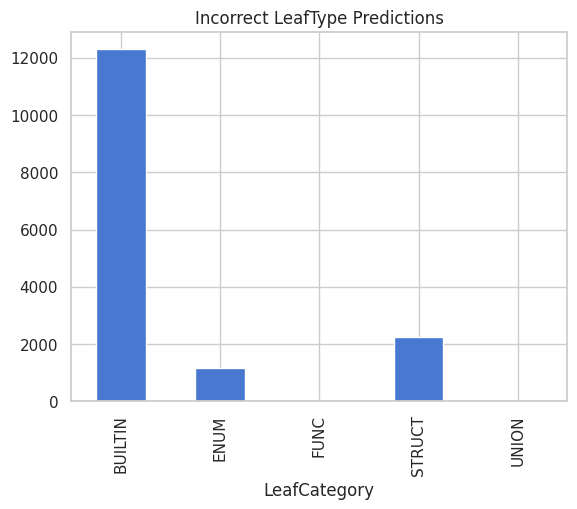

In [32]:
mdf[mdf.LeafType!=mdf.PredLeafType].groupby('LeafCategory').count().FunctionStart.plot(kind='bar',
    title='Incorrect LeafType Predictions')

<Axes: title={'center': 'Dataset by LeafCategory'}, xlabel='LeafCategory'>

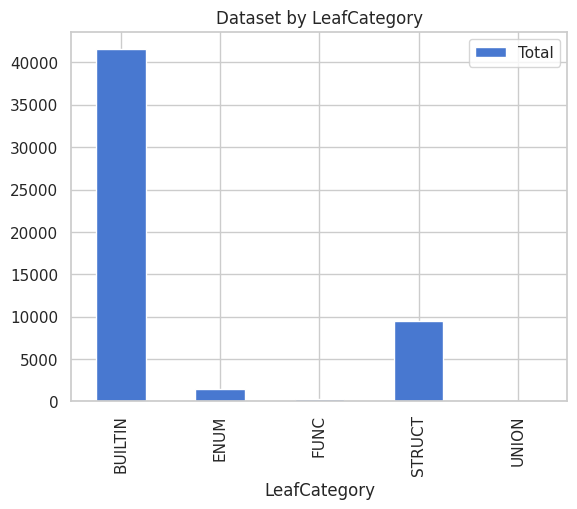

In [33]:
# print(f'{12661/41369*100:.2f}%')
# print(f'{28708/41369*100:.2f}%')
# print(f'{12661+28708:,}')

total_by_lcat = mdf.groupby('LeafCategory').count()[['FunctionStart']].rename({'FunctionStart':'Total'},axis=1)
total_by_lcat.plot(kind='bar', title='Dataset by LeafCategory')

<Axes: title={'center': 'Dataset by LeafType'}, xlabel='LeafType'>

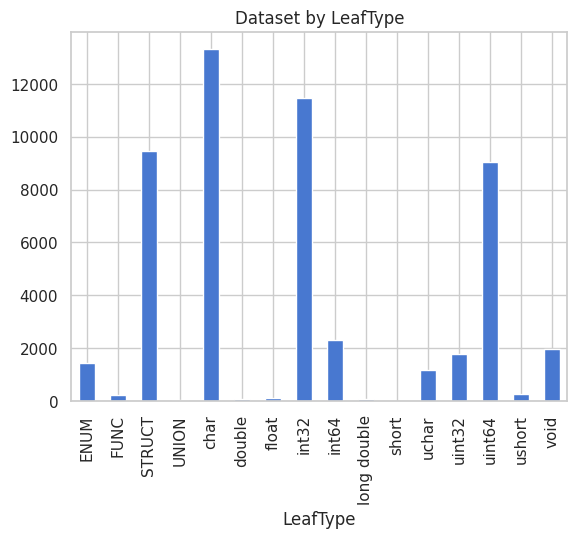

In [34]:
mdf.groupby('LeafType').count().FunctionStart.plot(kind='bar',title='Dataset by LeafType')

array([6.4, 4.8])

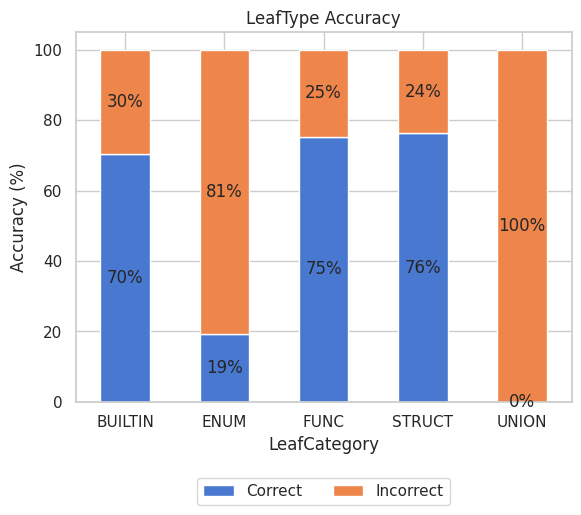

In [35]:

ldf = mdf.groupby([mdf.LeafType==mdf.PredLeafType, 'LeafCategory']).count()[['FunctionStart']]
ldf = ldf.reset_index(names=['Correct','LeafCategory'])\
    .pivot(index='LeafCategory', columns='Correct', values='FunctionStart')\
    .rename({False: 'Incorrect', True: 'Correct'},axis=1)

ldf['Total'] = total_by_lcat
ldf['Incorrect'] = ldf.Incorrect/ldf.Total*100
ldf['Correct'] = ldf.Correct/ldf.Total*100
ax = ldf[['Correct','Incorrect']].plot(kind='bar', stacked=True, rot=0, title='LeafType Accuracy',
    ylabel='Accuracy (%)', xlabel='LeafCategory')
ax.legend(loc='lower center', bbox_to_anchor=(.5,-0.3), ncol=2)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center')
ax.get_figure().get_size_inches()

In [36]:
# mdf[(mdf.LeafType!=mdf.PredLeafType)&(mdf.LeafCategory=='BUILTIN')].groupby('LocType_Strip').count().FunctionStart.plot(kind='bar')

# ----------------------------------------
# TODO: PICK UP HERE
#
# set up functions that accept a dataframe (or an interesting subset like this one)
# ----------------------------------------

# TODO - given this df, plot the correct/incorrect predictions SIDE BY SIDE as a grouped or stacked bar chart
# (like above)

# TODO: basically, convert the code above into a function that:
#   --> accepts a dataframe (incl. a subset)
#   --> accepts a condition to split on (leaftype!=predleaftype)
#   --> accepts a column to group the results by (LeafCategory above, the pivot index)
#   --> lets me choose to show percentages or values
# - percentages are nice when scales are out of whack, but you lose track of what's significant

subset_df = mdf.loc[mdf.LeafCategory=='BUILTIN']

<Axes: title={'center': 'Accuracy by Location'}, xlabel='LocType_Strip'>

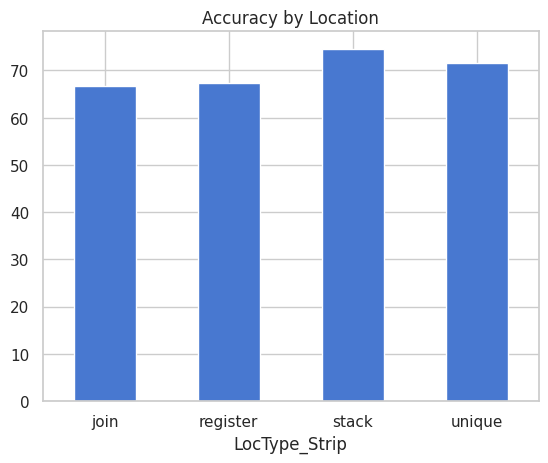

In [37]:

# len(subset_df[subset_df.TypeSeq_Debug==subset_df.Pred])/len(subset_df)*100
mdf.groupby('LocType_Strip').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',rot=0,
title='Accuracy by Location')

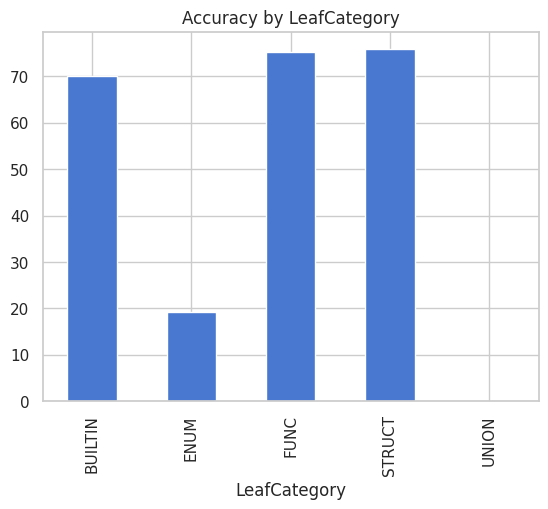

In [38]:
ax = mdf.groupby('LeafCategory').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',
    title='Accuracy by LeafCategory')

<Axes: title={'center': 'Inaccuracy by LeafType'}, xlabel='LeafType'>

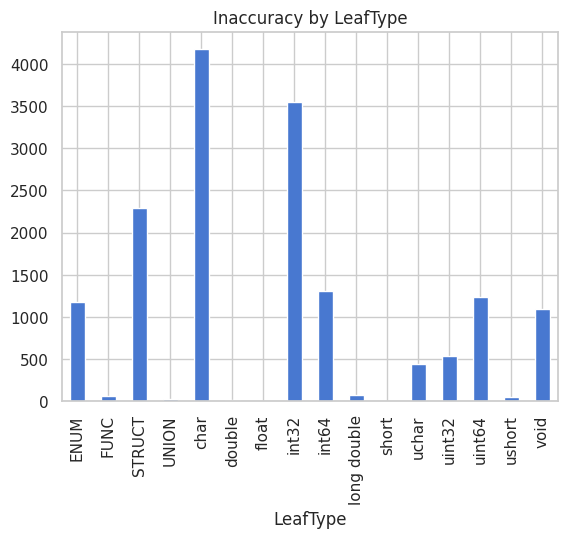

In [39]:
mdf.groupby('LeafType').apply(lambda gb: (len(gb)-gb.Correct.sum())).plot(kind='bar',
title='Inaccuracy by LeafType')

# mdf.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')

<Axes: xlabel='PredLeafType'>

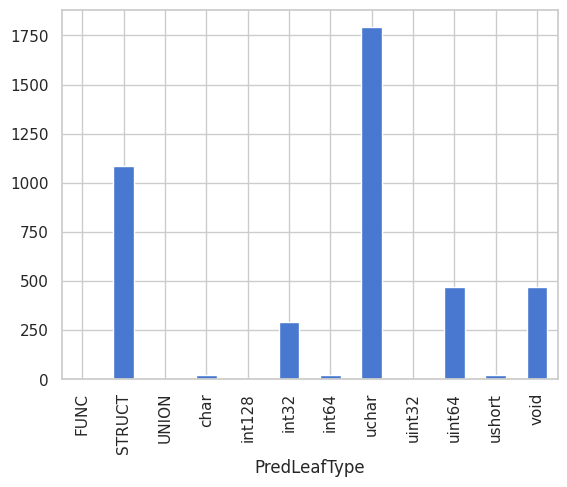

In [40]:
mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct)].groupby('PredLeafType').count().FunctionStart.plot(kind='bar')

<Axes: xlabel='BinaryId'>

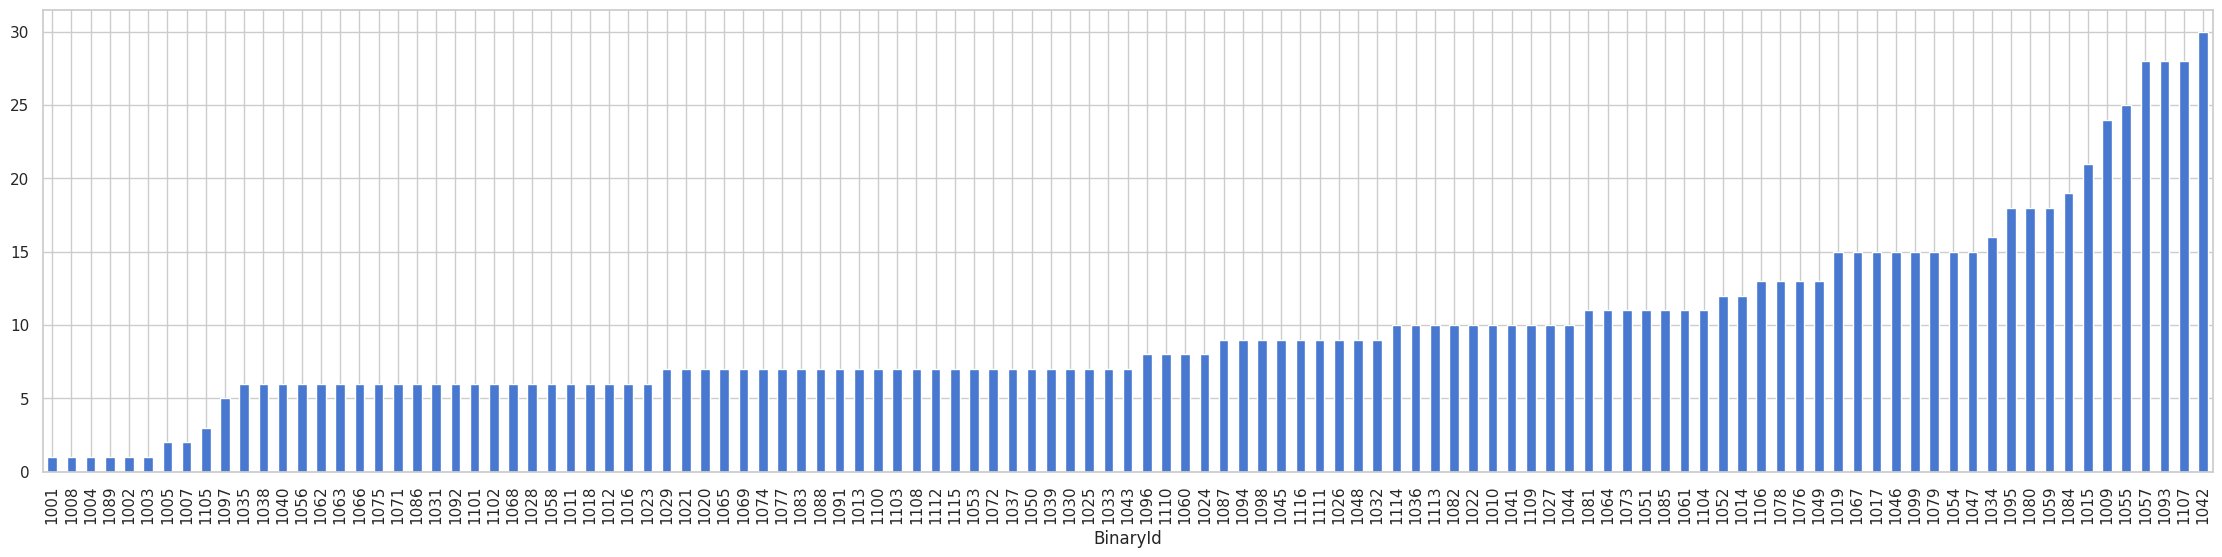

In [41]:
mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct)&(mdf.PredLeafType=='STRUCT')].groupby('BinaryId').count().FunctionStart.sort_values()\
    .plot(kind='bar',figsize=(28,6))

In [42]:
bdf = dataset.read_binaries_csv()

In [43]:
bdf[bdf.BinaryId==1042]

,BinaryId,Name,RunGid,OrigBinaryId
42,1042,sort,0,42


In [44]:
len(mdf[mdf.TypeSeq_Debug.apply(lambda x: x.split(',')[0])==mdf.Pred.apply(lambda x: x.split(',')[0])])/len(mdf)

0.8272442885581571

In [45]:
bin1042 = mdf.BinaryId==1042

row = mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct)&(mdf.PredLeafType=='STRUCT')&(bin1042)].iloc[1]
print(f'Binary: {bdf[bdf.BinaryId==row.BinaryId].Name.item()}')
print(hex(row.FunctionStart))
row

Binary: sort
0x1052d7


FunctionStart                     1069783
Signature                         333,344
Name_Strip                          uVar5
Type_Strip                         uint64
LocType_Strip                    register
LocRegName_Strip                      rax
LocOffset_Strip                       0.0
TypeCategory_Strip                BUILTIN
TypeSeq_Strip                      uint64
Name_Debug                        message
Type_Debug                          char*
LocType_Debug                    register
LocRegName_Debug                      rax
LocOffset_Debug                       0.0
TypeCategory_Debug                    PTR
TypeSeq_Debug                    PTR,char
HasDWARF                            False
TypeJson_Debug        {"kind": "Pointe...
LeafCategory                      BUILTIN
LeafSigned                           True
LeafFloating                        False
LeafSize                                1
PtrLevels                             PLL
PtrL1                             

In [46]:
mdf[mdf.LeafSize==1].groupby('LeafType').count()

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,PredLeafType,NumRefs,Correct
LeafType,,,,,,,,,,,,,,,,,,,,,
char,13311,13311,13311,13311,13311,8182,13311,13311,13311,13311,...,13311,13311,13311,13311,13311,13311,13311,13311,13311,13311
uchar,1169,1169,1169,1169,1169,381,1169,1169,1169,1169,...,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169


<Axes: title={'center': 'Register Variable Accuracy'}, xlabel='LeafCategory'>

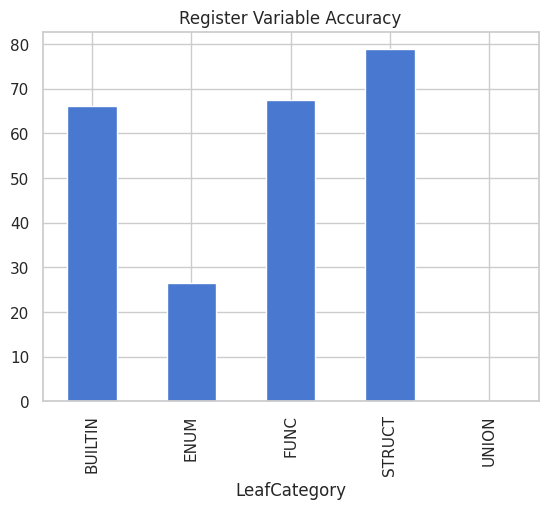

In [47]:
reg_df = mdf.loc[mdf.LocType_Strip=='register',:]
reg_df.groupby('LeafCategory').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',title='Register Variable Accuracy')

<Axes: title={'center': 'Regvar Accuracy by LeafType'}, xlabel='LeafType'>

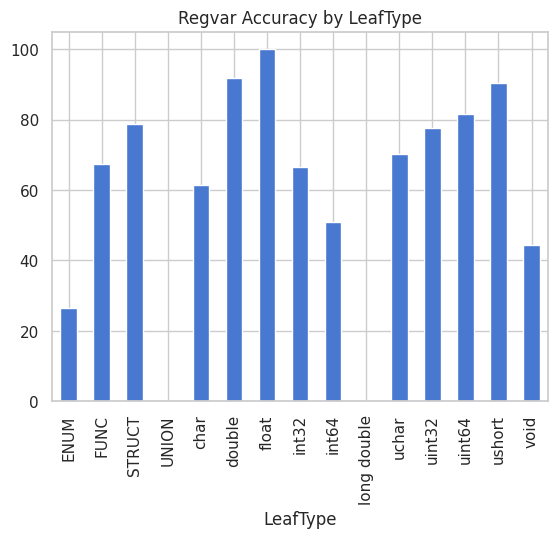

In [48]:
reg_df.groupby('LeafType').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar',
title='Regvar Accuracy by LeafType')

<Axes: title={'center': 'Regvar Inaccuracy by LeafType'}, xlabel='LeafType'>

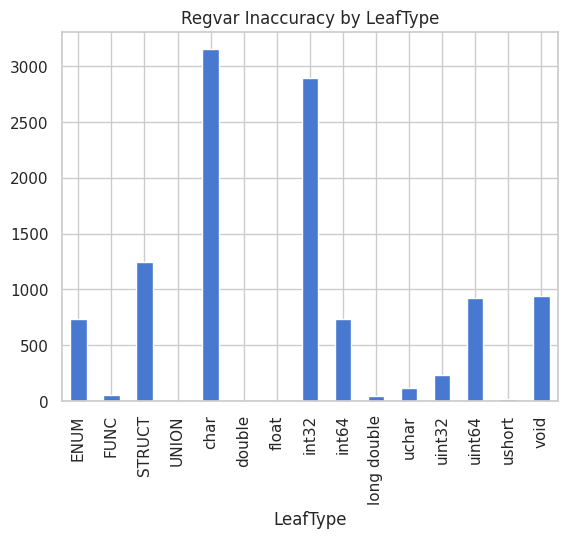

In [49]:
reg_df.groupby('LeafType').apply(lambda gb: (len(gb)-gb.Correct.sum())).plot(kind='bar',
title='Regvar Inaccuracy by LeafType')

In [50]:
reg_df.groupby('LeafType').count()[['FunctionStart']].sort_values('FunctionStart')

,FunctionStart
LeafType,
UNION,3
long double,45
double,73
float,100
FUNC,175
ushort,238
uchar,381
ENUM,998
uint32,1021


In [51]:
reg_df[reg_df.LeafType=='char'][['TypeSeq_Debug','LeafType','Pred','PredLeafType']]

,TypeSeq_Debug,LeafType,Pred,PredLeafType
0,"PTR,char",char,"PTR,char",char
11,"PTR,char",char,"PTR,void",void
18,"PTR,PTR,char",char,"PTR,PTR,char",char
78,"PTR,char",char,"PTR,uchar",uchar
85,"PTR,PTR,char",char,"PTR,PTR,char",char
...,...,...,...,...
52720,"PTR,char",char,"PTR,char",char
52724,"PTR,char",char,"PTR,uchar",uchar
52727,char,char,char,char
52731,char,char,char,char


In [52]:
reg_df[reg_df.LeafType=='uchar']

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType,NumRefs,Correct
472,1059674,"52,57,210,215",bVar2,uchar,register,al,0.0,BUILTIN,uchar,bVar2,...,L,L,BUILTIN,False,False,1,uchar,uchar,4,True
1171,1103344,"805,819,908,940,969",bVar2,uchar,register,al,0.0,BUILTIN,uchar,bVar3,...,L,L,BUILTIN,False,False,1,uchar,uchar,5,True
1172,1103344,"885,899,940,969",bVar3,uchar,register,al,0.0,BUILTIN,uchar,bVar4,...,L,L,BUILTIN,False,False,1,uchar,uchar,4,True
1560,1132557,"962,969,993,2034...",bVar1,uchar,register,al,0.0,BUILTIN,uchar,bVar1,...,L,L,BUILTIN,False,False,1,uchar,uchar,6,True
1624,1136496,"93,413",param_4,int64,register,rcx,8.0,BUILTIN,int64,trans,...,L,L,BUILTIN,False,False,0,uchar,void,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50227,1069659,"72,91",bVar1,uchar,register,al,0.0,BUILTIN,uchar,bVar1,...,L,L,BUILTIN,False,False,1,uchar,uchar,2,True
50794,1058953,"21,44",param_1,uchar,register,dil,56.0,BUILTIN,uchar,ch,...,L,L,BUILTIN,False,False,1,uchar,uchar,2,True
51264,1060996,"401,406,648,653",bVar4,uchar,register,al,0.0,BUILTIN,uchar,bVar6,...,L,L,BUILTIN,False,False,1,uchar,uchar,4,True
51505,1058921,"21,44",param_1,uchar,register,dil,56.0,BUILTIN,uchar,ch,...,L,L,BUILTIN,False,False,1,uchar,uchar,2,True


<Axes: xlabel='LeafType'>

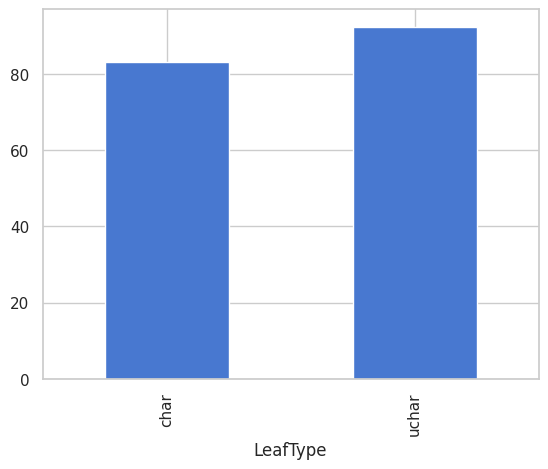

In [53]:
# mdf.loc[mdf.LeafSize==1,:].groupby('LeafType').apply(lambda gb: gb.Correct.sum()/len(gb)*100).plot(kind='bar')
mdf.loc[mdf.LeafSize==1,:].groupby('LeafType').apply(lambda gb: (gb.LeafSize==gb.PredLeafSize).sum()/len(gb)*100).plot(kind='bar')

True type is char, but we got it wrong - what size did we predict?

<Axes: xlabel='PredLeafSize'>

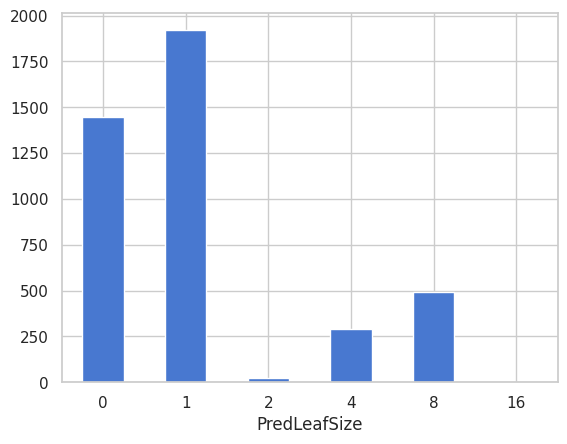

In [54]:
mdf.loc[(mdf.LeafType=='char')&(~mdf.Correct),:].groupby('PredLeafSize').count().FunctionStart.plot(kind='bar',rot=0)

> **Apparently, we often confusing true `char*` types with `STRUCT*`...why?**

- Maybe `LeafCategory` should feed into `LeafSize`...? (this was my original idea anyway)
- Do we need to increase width/depth of task-specific layer(s)?
- Maybe add more training data too (was at 200k vars...go up to 500k?)

> *What if we increase just `LeafCategory`'s depth and leave others independent/alone...does it noticeably improve?*

<Axes: xlabel='Pred'>

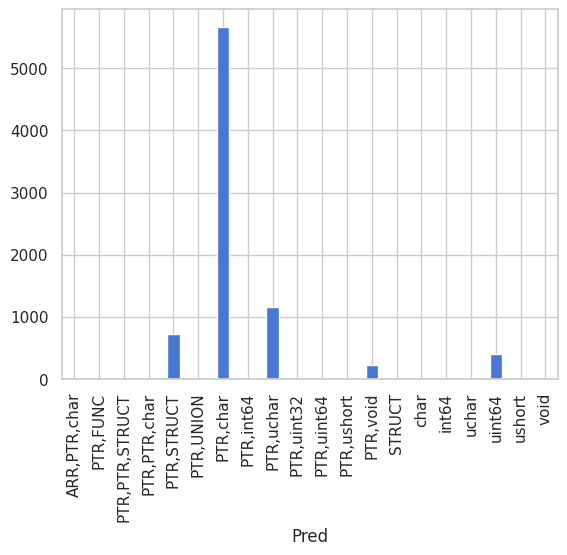

In [55]:
# mdf.loc[(mdf.TypeSeq_Debug=='PTR,char')&(~mdf.Correct),:].groupby('Pred').count().FunctionStart.plot(kind='bar')
mdf.loc[(mdf.TypeSeq_Debug=='PTR,char'),:].groupby('Pred').count().FunctionStart.plot(kind='bar')

In [56]:
no_regs = mdf.loc[mdf.LocType_Strip!='register']
len(no_regs[no_regs.TypeSeq_Strip==no_regs.TypeSeq_Debug])/len(no_regs)
len(reg_df[reg_df.TypeSeq_Strip==reg_df.TypeSeq_Debug])/len(reg_df)
len(no_regs)

18862

In [57]:
import numpy as np
mdf.groupby(np.where(mdf.LeafType==mdf.PredLeafType, 'Correct','Incorrect')).count()

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType,NumRefs,Correct
Correct,36950,36950,36950,36950,36950,22852,36950,36950,36950,36950,...,36950,36950,36950,36950,36950,36950,36950,36950,36950,36950
Incorrect,15795,15795,15795,15795,15795,11031,15795,15795,15795,15795,...,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795


In [58]:
model_pred

# TODO: sort individual classifiers - show highest performing!
# TODO: update this eval notebook and compute RESULTS
# TODO - update model to feed some outputs into other task-specific layers (see diagram)
# TODO - retrain with bigger dataset (w/e my custom training dataset was before?)
# TODO - overall accuracy? raw vs. corrected?
# TODO - individual classifiers? (leaf category, ptrl1, floating, signed...)
# TODO - accuracy on PTR,STRUCT true types?
#           -> locals vs. params? non-unique? register? ...
# TODO - eval on benchmarks vs. others (DIRTY, OSPREY, StateFormer...?)
# TODO - ok, what other experiments do we need to run to publish?
# ---> evaluate scalability?

,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1000,1053065,"25,33",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
1,1000,1053110,"17,26,40,48,62,66",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
2,1001,1053417,"37,78,82,107,111",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
3,1001,1053417,"78,82,107,111,130",p,"PTR,STRUCT","PTR,STRUCT",PLL,P,L,L,STRUCT,False,False,0
4,1001,1053575,"37,94,114",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52740,1116,1081955,14,p,uint32,uint32,LLL,L,L,L,BUILTIN,False,False,4
52741,1116,1081991,"60,67,73",l,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52742,1116,1081991,"14,14",p,uint32,uint32,LLL,L,L,L,BUILTIN,False,False,4
52743,1116,1082065,"14,25,25,34",p,uint32,uint32,LLL,L,L,L,BUILTIN,False,False,4


# Dataset Balance

<Axes: xlabel='LeafCategory'>

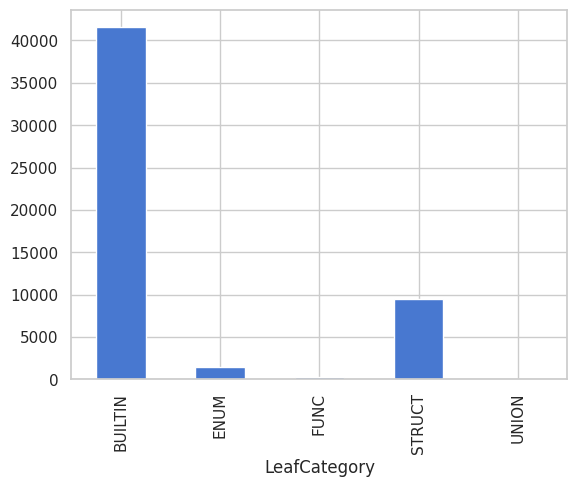

In [59]:
vdf.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')

# Num references

<Axes: xlabel='NumRefs'>

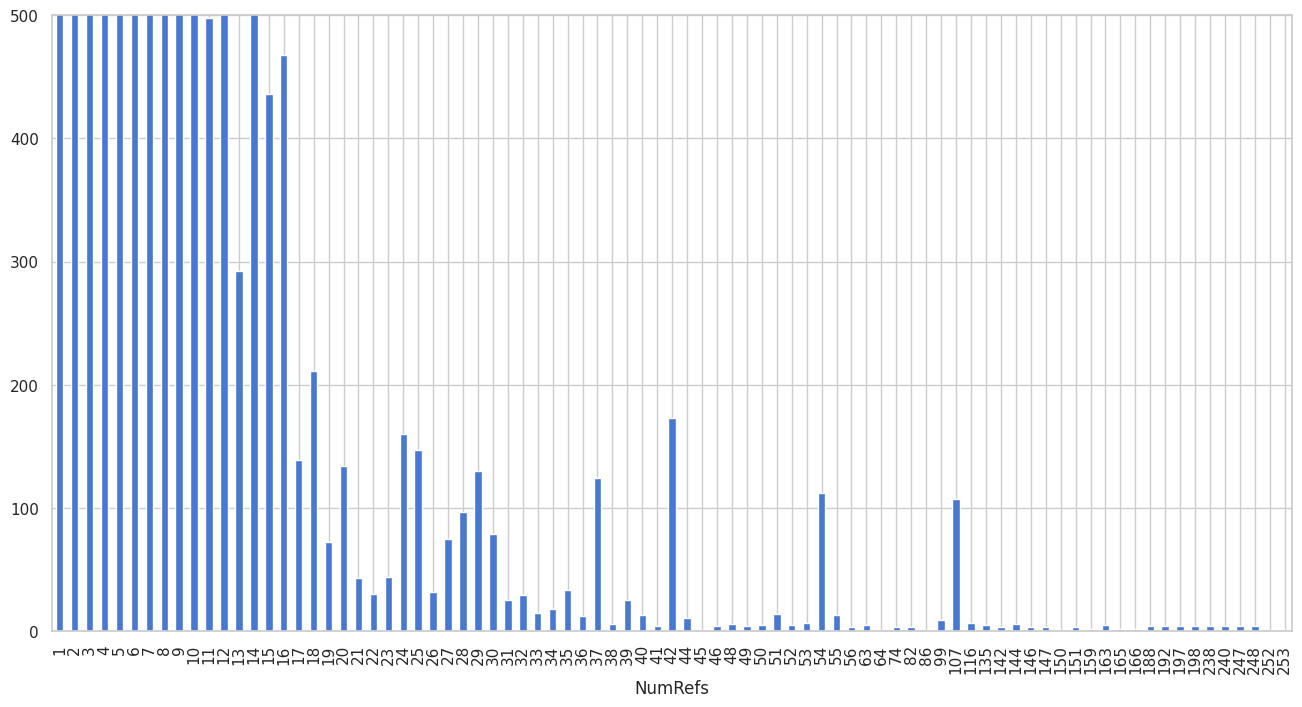

In [60]:
mdf.groupby('NumRefs').count().FunctionStart.plot(kind='bar', figsize=(16,8), ylim=(0, 500))

In [61]:
# TODO: this is a curve...(both accuracy for N+ references vs. N AND % vars having N+ refs vs. N)
NREFS = 7
atabove_nrefs = mdf[mdf.NumRefs>=NREFS].Correct.sum()/len(mdf[mdf.NumRefs>=NREFS])*100
below_nrefs = mdf[mdf.NumRefs<NREFS].Correct.sum()/len(mdf[mdf.NumRefs<NREFS])*100

print(f'Accuracy for {NREFS} or more references: {atabove_nrefs:.2f}%')
print(f'Accuracy for fewer than {NREFS} references: {below_nrefs:.2f}%')

print(f'{len(mdf[mdf.NumRefs<NREFS])/len(mdf)*100:.2f}% of data is below the threshold')

Accuracy for 7 or more references: 77.97%
Accuracy for fewer than 7 references: 67.53%
79.99% of data is below the threshold


In [138]:
# TODO: make this a function, call it with a filtered mdf:
# - BUILTIN leaf types
# - PTR,STRUCT types
# - STRUCT leaf types with 1+ pointer level (ptr/arr)
# - Stack-based STRUCTS
# - reg vars?
# - params
# - locals

records = []
for N in range(mdf.NumRefs.max()):
    above_mdf = mdf[mdf.NumRefs>=N]
    below_mdf = mdf[mdf.NumRefs<N]
    acc_above = above_mdf.Correct.sum()/len(above_mdf)*100 if len(above_mdf) else 0.0
    acc_below = below_mdf.Correct.sum()/len(below_mdf)*100 if len(below_mdf) else 0.0
    vars_above = len(above_mdf)/len(mdf)*100
    records.append((N, acc_above, acc_below, vars_above))

refs_df = pd.DataFrame.from_records(records, columns=['NumRefs','AccAbove','AccBelow','VarsAbove'])
refs_df

,NumRefs,AccAbove,AccBelow,VarsAbove
0,0,69.619869,0.000000,100.000000
1,1,69.619869,0.000000,100.000000
2,2,73.264675,45.063811,87.075552
3,3,75.756262,57.907798,65.619490
4,4,77.928086,61.709845,48.772395
...,...,...,...,...
248,248,100.000000,69.616413,0.011375
249,249,100.000000,69.618717,0.003792
250,250,100.000000,69.618717,0.003792
251,251,100.000000,69.618717,0.003792


<Axes: xlabel='# References/10'>

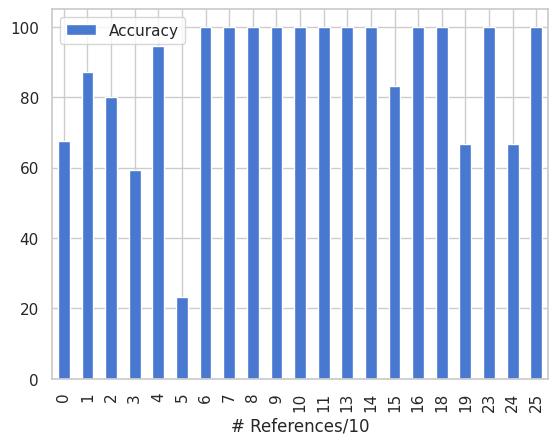

In [139]:
pd.DataFrame(mdf.groupby(mdf.NumRefs.apply(lambda nr: int(nr/10))).pipe(lambda gb: [(x[0], x[1].Correct.sum()/len(x[1])*100) for x in gb]),
columns=['TensOfRefs', 'Accuracy']).plot(kind='bar', x='TensOfRefs', y='Accuracy', xlabel='# References/10')
#count().FunctionStart.plot(kind='bar')

(0.0, 80.0)

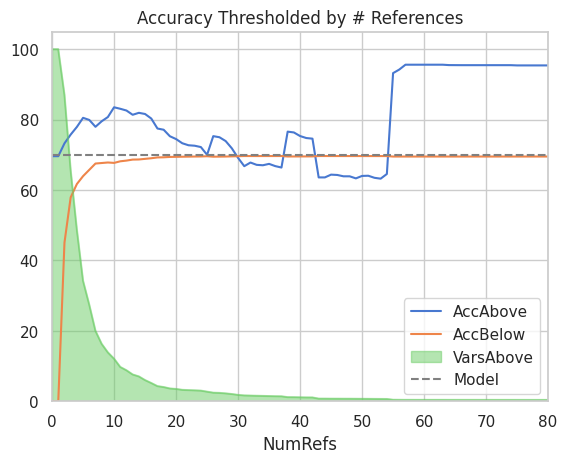

In [151]:
ax = refs_df.plot(x='NumRefs', y=['AccAbove', 'AccBelow'], title='Accuracy Thresholded by # References')
#, figsize=)
# kind='bar'
refs_df.plot.area(x='NumRefs', y='VarsAbove', ax=ax, alpha=0.5)

# TODO - don't hardcode 70% accuracy lol, actually use model acc
ax.hlines(70, xmin=0, xmax=mdf.NumRefs.max(), colors='gray', linestyles='--', label='Model')
# ax.legend(loc='lower right')
ax.legend(loc='best')
# ax.set_xlim(0, 25)
ax.set_xlim(0, 80)
# ax.set_xlim(0, 250)


In [65]:
# NOTE: now the question is - can these higher-accuracy predictions REACH the lower-accuracy ones in such
# a way that we can IMPROVE their accuracy by waiting until we've retyped the high-quality set?
# EXP 1: apply my "high quality" predictions as-is (including wrong ones)
# EXP 2: apply truth for "high quality" predictions - if this has no effect then this idea may not be interesting

<Axes: xlabel='NumRefs'>

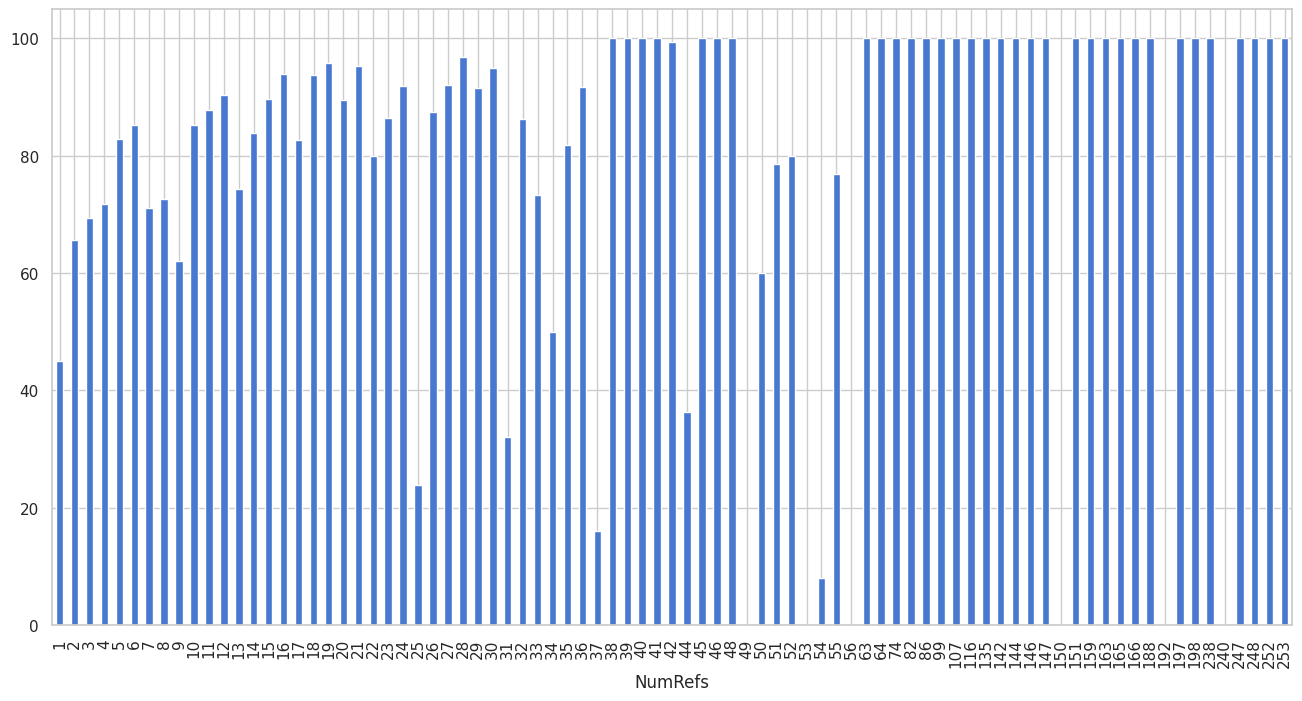

In [66]:
pd.DataFrame(mdf.groupby('NumRefs').pipe(lambda gb: [(x[0], x[1].Correct.sum()/len(x[1])*100) for x in gb]),
columns=['NumRefs','Accuracy']).set_index('NumRefs').Accuracy.plot(kind='bar', figsize=(16,8))